In [2]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt

In [3]:
traj = md.load_xtc('../Setup/water_box/gromacs/step5_centered.xtc', top='../Setup/water_box/gromacs/step5_1.gro')


In [72]:
# Returns average displacement of certain atoms over time by frame
def displacement(traj, selection):
    frame_avgs = []
    for frame in traj.xyz:
        avg = 0
        for atom in frame[selection]:
            avg += np.linalg.norm(atom - traj.xyz[0][selection])
        avg /= len(frame[selection])
        #print(avg)
        frame_avgs.append(avg)
    return frame_avgs

In [ ]:
def displacement2(traj, selection):
    for frame in traj:
    md.compute_displacements(traj, [traj.xyz[0][selection], traj.xyz])

In [73]:
print(len(traj.xyz))
water_o = traj.topology.select('water and name O')
sodiums = traj.topology.select('resname SOD')

sodium_distances = displacement(traj, sodiums)
print(sodium_distances)

water_distances = displacement(traj, water_o)
print(water_distances)


901
[13.732085227966309, 13.875740459987096, 13.910279955182757, 13.830678122384208, 13.911237580435616, 13.985102653503418, 13.841477257864815, 14.041563715253558, 13.970308167593819, 13.903152465820312, 13.91079316820417, 13.610002517700195, 13.756250245230538, 13.834990501403809, 13.736265182495117, 13.750046457563128, 13.865430968148369, 14.19225788116455, 14.067374365670341, 14.448145593915667, 14.45672253199986, 14.508702959333148, 14.499919482639857, 14.947559765407018, 14.777202878679548, 14.804499217442103, 15.210583414350237, 15.266806738717216, 15.21885313306536, 15.310514586312431, 15.486358097621373, 15.69699137551444, 15.660567964826312, 15.807805333818708, 16.122078486851283, 16.14499855041504, 16.062815257481166, 15.888427598135811, 16.238670076642716, 16.36306176866804, 16.35473496573312, 16.025271551949636, 16.19734001159668, 16.155551501682826, 16.262865611485072, 16.363509723118373, 16.237824848720006, 16.39318084716797, 16.425808225359237, 16.684855188642228, 16.46

[304.87915813630326, 307.1247519687977, 309.63697909150926, 311.446484383672, 313.28696825386663, 315.2469304566912, 317.3006255559544, 319.36464474164865, 321.41466377354874, 323.9903990485138, 326.20804519673027, 328.4025589891935, 330.26248359335267, 332.3588802305126, 334.8526933020136, 336.5858513199676, 338.9288698125951, 341.02040901864046, 343.0397228338527, 345.00785547373243, 346.7548741641447, 349.1914357466465, 351.3331880837995, 352.70146697548677, 354.613882342225, 356.3370387225889, 358.86684396241685, 360.96199863032757, 362.3389377500376, 364.5812769707276, 366.7030655376303, 369.211384427606, 370.8225857402828, 372.3610519097776, 374.5995882704904, 376.10306748331317, 378.0410823718549, 380.03030682866563, 382.154035118377, 384.0650099978771, 386.15769555641987, 388.2532700440336, 390.1946198629243, 392.07182534724603, 394.41083942670537, 397.0164152129126, 399.0027481469342, 400.93960713194616, 402.61378820759785, 404.180238385251, 405.25453257382117, 407.37232156811

901
901


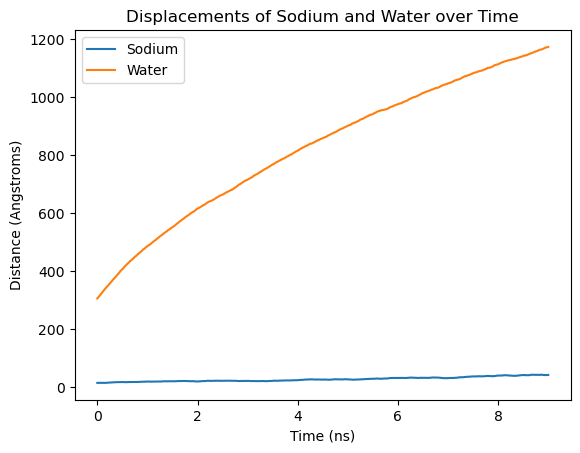

In [80]:
print(len(sodium_distances))
print(len(water_distances))

# from Week 2, plot distance vs time
plt.xlabel('Time (ns)')
plt.ylabel('Distance (Angstroms)')
plt.title('Displacements of Sodium and Water over Time')


# plot 
plt.plot(traj.time / 1000, sodium_distances, label='Sodium')
plt.plot(traj.time / 1000, water_distances, label='Water')

plt.legend()
plt.savefig('../Figures/water_box_plots.png')
plt.show()